In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
import pandas as pd
from finta import TA

def add_finta_feature(data, data_finta ,feature_names, both_columns_features):
    for feature_name in feature_names:
        feature_func = getattr(TA, feature_name)
        finta_feature = feature_func(data_finta) 
        if finta_feature.ndim > 1:
            if feature_name in both_columns_features:
                data["{}_1".format(feature_name)] = finta_feature.iloc[:, 0]
                data["{}_2".format(feature_name)] = finta_feature.iloc[:, 1]
            else:
                data[feature_name] = finta_feature.iloc[:, 0]
        else:
            data[feature_name] = finta_feature

In [ ]:
data = pd.read_csv("Binance_XRPUSDT_1h.csv", skiprows = 1)[::-1].reset_index(drop = True).head(10000)
data = data.drop(['date', 'symbol', 'Volume USDT', 'tradecount'], axis = 1 )
columns_dict = {'unix': 'Unix_timestamp',
                'open': 'Opening_price',
                'high': 'Highest_price',
                'low': 'Lowest_price',
                'close': 'Closing_price',
                'Volume XRP': 'Volume_of_transactions'
               }
data = data.rename(columns=columns_dict)
data = data.sort_values('Unix_timestamp', ignore_index=True)
data['Unix_timestamp'] = pd.to_datetime(data['Unix_timestamp'], unit='ms') + pd.Timedelta('08:00:00')
data = data.rename(columns={'Unix_timestamp': 'Timestamp'})
data_finta = pd.DataFrame()
data_finta['open'] = data['Opening_price']
data_finta['high'] = data['Highest_price']
data_finta['low'] = data['Lowest_price']
data_finta['close'] = data['Closing_price']
data_finta['volume'] = data['Volume_of_transactions']
data_min = data.copy()
extra_features = ['TRIX', 'VWAP', 'MACD', 'EV_MACD', 'MOM', 'RSI', 'IFT_RSI', 'TR', 'ATR', 'BBWIDTH', 'DMI', 'ADX', 'STOCHRSI',
                  'MI', 'CHAIKIN', 'VZO', 'PZO', 'EFI', 'EBBP', 'BASP', 'BASPN', 'WTO', 'SQZMI', 'VFI', 'STC']
both_columns_features = ["DMI", "EBBP", "BASP", "BASPN"]
add_finta_feature(data_min, data_finta, extra_features, both_columns_features)
data_min["change"] = 100*(data_min.Closing_price - data_min.Opening_price)/data_min.Opening_price
data_min["change_bool"] = data_min["change"] > 0
data_min["change_bool"] = data_min.change_bool.astype(int)
data_min["target"] = data_min.change_bool.shift(-1)
data_min = data_min.dropna(axis =0 )
data_min["target"] = data_min.target.astype(int)
data_min["SQZMI"] = data_min.SQZMI.astype(int)
data_min = data_min.drop(['Timestamp', 'Opening_price', 'Highest_price', 'Lowest_price','Closing_price', 'Volume_of_transactions', 'change', 'change_bool'], axis = 1)
data_min = data_min.reset_index(drop = True)
data = data_min.copy()

In [3]:
data

,TRIX,VWAP,MACD,EV_MACD,MOM,RSI,IFT_RSI,TR,ATR,BBWIDTH,DMI_1,DMI_2,ADX,STOCHRSI,MI,CHAIKIN,VZO,PZO,EFI,EBBP_1,EBBP_2,BASP_1,BASP_2,BASPN_1,BASPN_2,WTO,SQZMI,VFI,STC,target
0,0.035418,0.300419,1.001885e-03,0.044673,0.0031,56.326598,-0.296926,0.0020,0.003064,0.025371,18.949621,18.685588,12.420931,0.457669,25.581942,1.623551e+07,6.141517,8.109730,9918.820251,0.001413,-0.000587,0.542115,0.040687,1.154309,0.787011,26.212535,1,-4.655338,100.000000,0
1,0.034482,0.300415,4.514019e-04,0.039939,-0.0050,40.291907,-0.973866,0.0159,0.003979,0.028858,17.595890,42.309265,14.480753,0.447501,26.147453,1.913156e+07,-34.942990,-6.067564,-86466.541776,0.002254,-0.013646,12.189835,14.233431,2.205313,2.067625,6.433865,1,-2.336592,93.550160,0
2,0.031968,0.300417,-9.863088e-07,0.039020,-0.0030,39.951684,-0.612433,0.0031,0.004029,0.030938,16.338881,39.286789,16.393403,0.435793,26.507175,1.631804e+07,-40.683969,-18.405642,-74685.854362,-0.002397,-0.005497,0.320258,0.890103,2.025784,1.955480,-4.661638,1,-3.232354,75.989209,0
3,0.027384,0.300404,-6.186505e-04,0.037432,-0.0076,34.739302,0.161936,0.0053,0.004257,0.038361,15.171679,41.850021,18.564600,0.419532,26.383015,6.591648e+06,-49.378647,-29.041809,-79928.039065,-0.002283,-0.007583,0.494859,2.895627,1.879981,2.045018,-15.773257,1,-3.275078,47.317147,0
4,0.019204,0.300095,-1.701777e-03,0.030614,-0.0145,26.246413,0.585415,0.0206,0.005564,0.059125,14.087869,62.868180,21.766596,0.398602,26.736796,1.023280e+07,-71.629595,-38.112160,-238438.539966,-0.003643,-0.024243,20.505609,18.139177,3.653853,3.577797,-31.195505,1,-6.552885,20.433654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,-0.120938,0.754881,1.126786e-03,-0.022791,0.0261,51.042266,-0.222817,0.0136,0.021300,0.103999,13.850053,17.843809,28.394650,0.406713,25.007546,-4.243770e+06,15.182865,9.521928,85791.222962,0.005863,-0.007737,0.471270,0.136019,0.936377,0.858883,11.135968,0,-15.791988,100.000000,1
9864,-0.108949,0.754891,1.493102e-03,-0.022243,0.0085,52.157174,-0.390612,0.0143,0.021157,0.105501,15.021466,16.569251,26.716425,0.421045,25.045305,-2.260481e+06,25.066345,21.660419,96254.374784,0.011382,-0.002918,0.558981,0.410684,0.900435,0.816197,12.011200,0,-15.639805,100.000000,1
9865,-0.096546,0.754905,2.568784e-03,-0.021319,0.0311,55.405965,-0.295628,0.0265,0.021257,0.108813,20.030493,15.385733,25.744879,0.437136,25.175849,-2.496248e+06,36.302662,32.260334,171048.121621,0.027285,0.000785,1.102819,1.230036,0.919709,0.855611,18.062954,0,-15.227046,100.000000,1
9866,-0.081568,0.754957,5.528150e-03,-0.016960,0.0365,62.675610,0.116437,0.0363,0.021136,0.118897,26.102278,14.286752,25.995551,0.451158,25.302574,2.890313e+07,59.550286,41.633431,929970.154232,0.043758,0.007458,6.692860,2.478366,1.469533,1.010159,28.771916,0,-13.736256,100.000000,1


In [4]:
s = setup(data, target='target',
              experiment_name='xrp_indicators',
              silent=True)

,Description,Value
0,session_id,5886
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9868, 30)"
5,Missing Values,0
6,Numeric Features,28
7,Categorical Features,1
8,Ordinal Features,0
9,High Cardinality Features,0


In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5286,0.0000,0.5321,0.5328,0.5322,0.0571,0.0572,0.0040
lightgbm,Light Gradient Boosting Machine,0.5276,0.5390,0.5493,0.5307,0.5397,0.0548,0.0548,0.2230
lda,Linear Discriminant Analysis,0.5269,0.5405,0.5301,0.5313,0.5304,0.0537,0.0537,0.0060
et,Extra Trees Classifier,0.5269,0.5334,0.5204,0.5321,0.5260,0.0538,0.0539,0.1360
rf,Random Forest Classifier,0.5257,0.5390,0.5204,0.5308,0.5255,0.0515,0.0515,0.3670
gbc,Gradient Boosting Classifier,0.5179,0.5228,0.5686,0.5206,0.5434,0.0348,0.0350,0.8420
svm,SVM - Linear Kernel,0.5131,0.0000,0.4533,0.5230,0.4812,0.0273,0.0278,0.0080
lr,Logistic Regression,0.5121,0.5120,0.3939,0.5211,0.4482,0.0264,0.0270,0.1840
knn,K Neighbors Classifier,0.5101,0.5121,0.5089,0.5146,0.5116,0.0201,0.0201,0.0080
qda,Quadratic Discriminant Analysis,0.5085,0.5118,0.8916,0.5076,0.6467,0.0097,0.0140,0.0040


In [6]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=5886,
                solver='auto', tol=0.001)


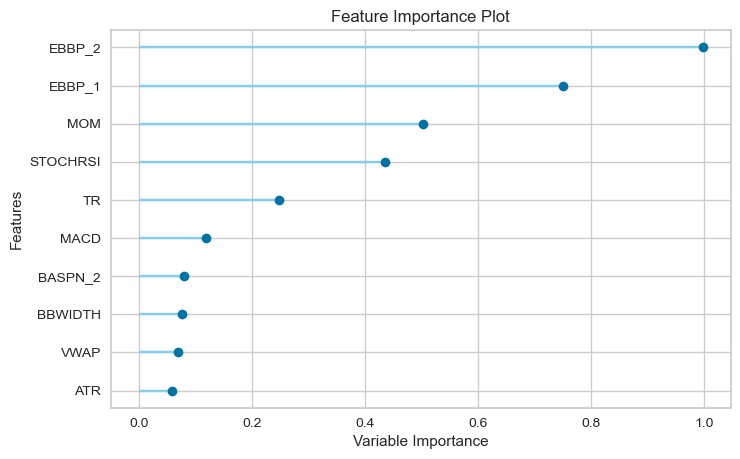

In [8]:
plot_model(best, plot='feature')

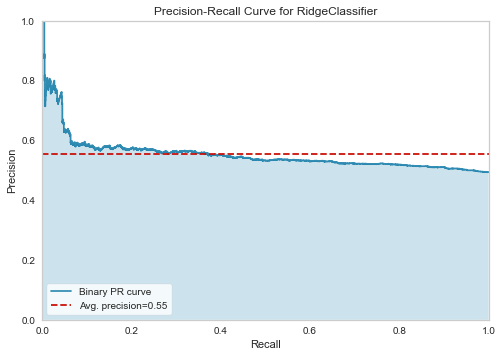

In [9]:
plot_model(best, plot='pr')

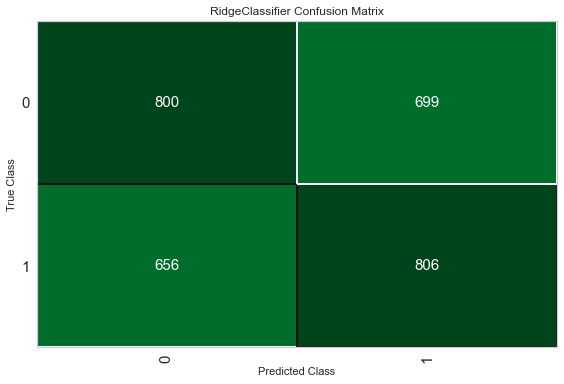

In [11]:
plot_model(best, plot = 'confusion_matrix')

#### Almost half of predictions are wrong